# Численное дифференцирование

Физический смысл производной - скорость изменения величины. Производная от перемещения - скорость. Производная от скорости - ускорение.

Когда величина задана в виде зависимости, то есть в виде формулы - найти ее производную обычно не составляет труда, для этого используются [правила дифференцирования](http://www.math24.ru/%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%B5%D0%B9%D1%88%D0%B8%D0%B5-%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%B0-%D0%B4%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F.html).

Например, зная, по какой формула вычисляется пройденное каким-либо объектом расстояние в любой момент времени, несложно найти так же и скорость этого объекта в любой момент времени.

Ситуация осложняется, когда зависимость перемещения от времени не выражена формулой, а дана в виде таблицы, в которой указаны значения расстояния, пройденого объектом, и моменты времени, в которые это расстояние достигнуто.

В данном слчае необходимо использовать численные методы, а именно, численное дифференцирование. Собственно, одинаковый подход используется при численном дифференцировании любой величины, значения которой известны с течением времени, или, еше точнее, в том случае, если известна зависимость одной величины от другой в табличном виде. 

## Математическая основа численного дифференцирования

Все методы численного дифференцирования основаны на определении производной величины. Напомним, производной величины $y$ по величине $x$ в точке $x_i$ называется величина

$$
y'_x = \lim_{(x_{i+1} - x_i) \to 0} \frac {y_{i+1} - y_i} {x_{i+1} - x_i}
$$

Собственно, численное дифференцирование основано на том, что при достаточно малой величине $x_{i+1} - x_i$ значение предела будет достаточно близким к значению дроби, то есть

$$
y'_x \approx \frac {y_{i+1} - y_i} {x_{i+1} - x_i}
$$

Очевидно, что считать производную в точке $x_i$ можно по-разному:

$$
y'_x \approx \frac {y_{i+1} - y_i} {x_{i+1} - x_i}
$$

и

$$
y'_x \approx \frac {y_{i} - y_{i-1}} {x_{i} - x_{i-1}}
$$

Формулы называтся формулами правой и левой разности соответственно.

Рассмотрим графическую иллюстрацию. Построим график функции и рассмотрим приближенное вычисление производной.

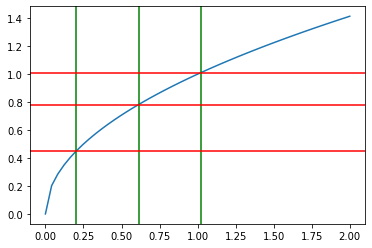

x0=0.2040816326530612,x1=0.6122448979591836,x2=1.0204081632653061
y0=0.4517539514526256,y1=0.7824607964359516,y2=1.0101525445522108


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

def square(x):
    return math.pow(x, 0.5)

xs = np.linspace(0, 2)
ys = [square(x) for x in xs]

fig = plt.figure()
plt.plot(xs, ys)
plt.axvline(x=xs[5], color='green')
plt.axvline(x=xs[15], color='green')
plt.axvline(x=xs[25], color='green')

plt.axhline(y=ys[5], color='red')
plt.axhline(y=ys[15], color='red')
plt.axhline(y=ys[25], color='red')

plt.show()
print('x0={},x1={},x2={}'.format(xs[5], xs[15], xs[25]))
print('y0={},y1={},y2={}'.format(ys[5], ys[15], ys[25]))

Как можно видеть, мы рассматриваем точки $x_{i-1}=0.2$, $x_i=0.4$ и $x_{i+1}=0.6$, в которых значение функции соответственно равно $y_{i-1}=0.45$, $y_i=0.78$ и $y_{i+1}=1.01$.
Очевидно, что при одинаковом расстоянии между точками по $x$, равному 0.2, расстояние между точками по $y$ составляет 0.33 и 0.23.

Таким образом, если считать производную по формуле левой разницы

$$
y'_x \approx \frac {y_{i} - y_{i-1}} {x_{i} - x_{i-1}}
$$

то получаем значение производной, равное

In [28]:
(ys[15] - ys[5]) / (xs[15] - xs[5])

0.8102317702091488

а если по формуле правой разности

$$
y'_x \approx \frac {y_{i+1} - y_i} {x_{i+1} - x_i}
$$

то значение производной будет

In [25]:
(ys[25] - ys[15]) / (xs[25] - xs[15])

0.557844782884835

Очевидно, что разница достаточно велика, хотя мы считаем значение производной в одной и той же точке.

Можно предположить, что реальное значение производной будет чем-то средним между этими двумя значениями. 
Существует формула, называемая формулой центральной разности, которая фактически берет среднее от этих двух значений

$$
y'_x \approx \frac {\frac {y_{i+1} - y_i} {x_{i+1} - x_i} + \frac {y_{i} - y_{i-1}} {x_{i} - x_{i-1}}} {2}
$$